# Machine Learning

- A machine learning model is a program that learns patterns from data and then uses those patterns to make predictions or decisions on new, unseen data.
- Instead of writing rules manually like: “If this happens, do that”
- We say: “Here is historical data — learn from it and figure out the rules yourself.”
- Example: Input: Hours studied, Output: Exam score
- The model learns the relationship between study hours and score, and later predicts the score for a new student.

### Why do we use Machine Learning models?
1. Rules are too complex to write manually
2. Data is growing very fast
3. We want predictions, not just reports
4. Automation and scalability


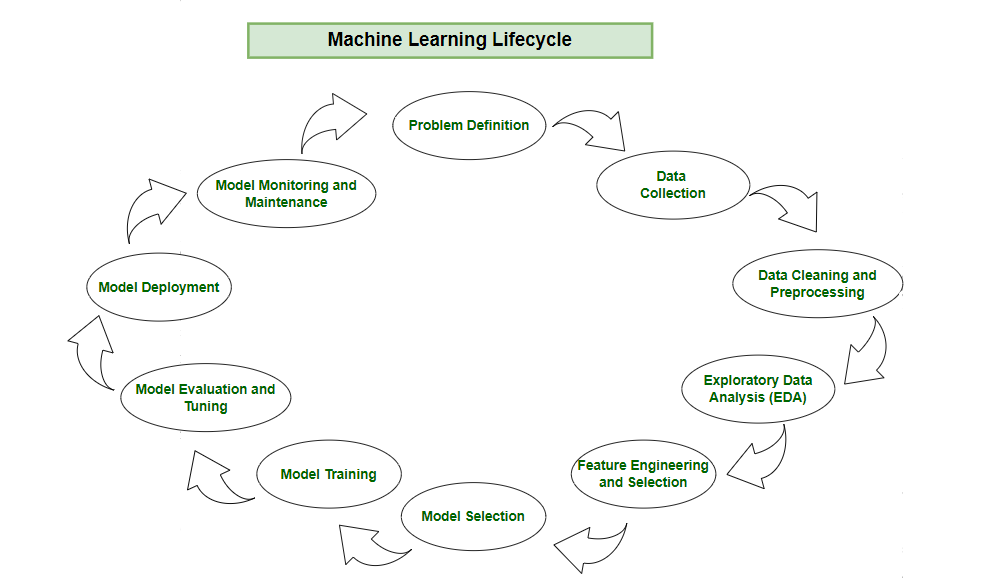

##### 1. Problem Definition
- Clearly define what problem you want to solve and what output you expect from the model.

##### 2. Data Collection
- Gather historical data from databases, files, APIs, sensors, or logs that are relevant to the problem.

##### 3. Data Cleaning and Preprocessing
- Fix missing values, remove duplicates, handle outliers, and convert data into a usable format.

##### 4. Exploratory Data Analysis (EDA)
- Analyze and visualize data to understand patterns, trends, relationships, and potential issues.

##### 5. Feature Engineering and Selection
- Create meaningful input features and select the most important ones for the model.

##### 6. Model Selection
- Choose the most suitable machine learning algorithm based on the problem and data type.

##### 7. Model Training
- Train the selected model using training data so it can learn patterns from the data.

##### 8. Model Evaluation and Tuning
- Measure model performance using metrics and tune hyperparameters to improve accuracy.

##### 9. Model Deployment
- Deploy the trained model into a real-world environment for actual use.

##### 10. Model Monitoring and Maintenance
- Continuously monitor model performance and retrain it when data or patterns change.

### What is Regression Analysis
- Regression helps us understand how one thing changes when other things change, and then use that understanding to make predictions.
- Example: Imagine you want to predict a house price.
- House price → what we want to predict (Dependent Variable / Label)
- Size, bedrooms, location, age → things we already know (Independent Variables / Features)
- When these features change, how does the house price change? Then it uses this relationship to predict the price of a new house.

### Why do we use regression analysis?

We use regression to:
- Predict future values (sales, price, demand)
- Understand relationships between variables
- Analyze trends over time
- Make data-driven decisions


# Linear Regression

- Linear Regression draws the best straight line that shows how one thing changes when another thing changes, and uses that line to make predictions.


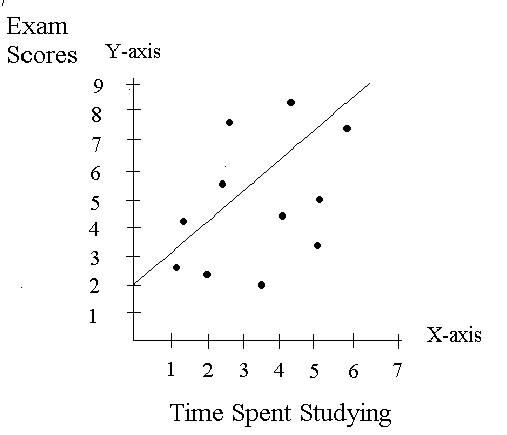

- Study Hours (X) → Independent variable (input)
- Exam Marks (Y) → Dependent variable (output)

Linear Regression:

- Draws a straight line that best fits these points

- Uses that line to predict marks for new study hours

Example: Study 5 hours → Predict ~80 marks

#### What does the “best-fit line” mean?
- The best-fit line is the line that:
- Is closest to all the data points
- Minimizes the total error between: Actual values and Predicted values

The equation of the Linear Regression is: Y = a + bX + e
- Y → Value we want to predict (e.g., exam marks)
- X → Input value (e.g., study hours)
- a (Intercept) → Starting value of Y when X = 0 (marks when no study is done)
- b (Slope) → How much Y changes when X increases by 1 (extra marks per additional study hour)
- e (Error) → Difference between predicted value and actual value

### The Problem statement:

This data is about the amount spent on advertising through different channels like TV, Radio and Newspaper. The goal is to predict how the expense on each channel affects the sales and is there a way to optimise that sale?



In [1]:
# necessary Imports
import pandas as pd
import matplotlib.pyplot as plt
import pickle
% matpllotlib inline

UsageError: Line magic function `%` not found.


In [2]:

data= pd.read_csv('Advertising_Budget_and_Sales.csv') # Reading the data file

In [3]:
data.head() # checking the first five rows from the dataset

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


What are the **features**?
- TV: Advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- Radio: Advertising dollars spent on Radio
- Newspaper: Advertising dollars spent on Newspaper

What is the **response**?
- Sales: sales of a single product in a given market (in thousands of widgets)

In [13]:
# Rename columns to simple names
data = data.rename(columns={
    "TV Ad Budget ($)": "TV",
    "Radio Ad Budget ($)": "Radio",
    "Newspaper Ad Budget ($)": "Newspaper",
    "Sales ($)": "Sales"
})


In [4]:
data.shape

(200, 5)

In [5]:
data.info() # printing the summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               200 non-null    int64  
 1   TV Ad Budget ($)         200 non-null    float64
 2   Radio Ad Budget ($)      200 non-null    float64
 3   Newspaper Ad Budget ($)  200 non-null    float64
 4   Sales ($)                200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [6]:
data.isna().sum() # finding the count of missing values from different columns

Unnamed: 0                 0
TV Ad Budget ($)           0
Radio Ad Budget ($)        0
Newspaper Ad Budget ($)    0
Sales ($)                  0
dtype: int64

Now, let's showcase the relationship between the feature and target column

<Axes: xlabel='Newspaper Ad Budget ($)', ylabel='Sales ($)'>

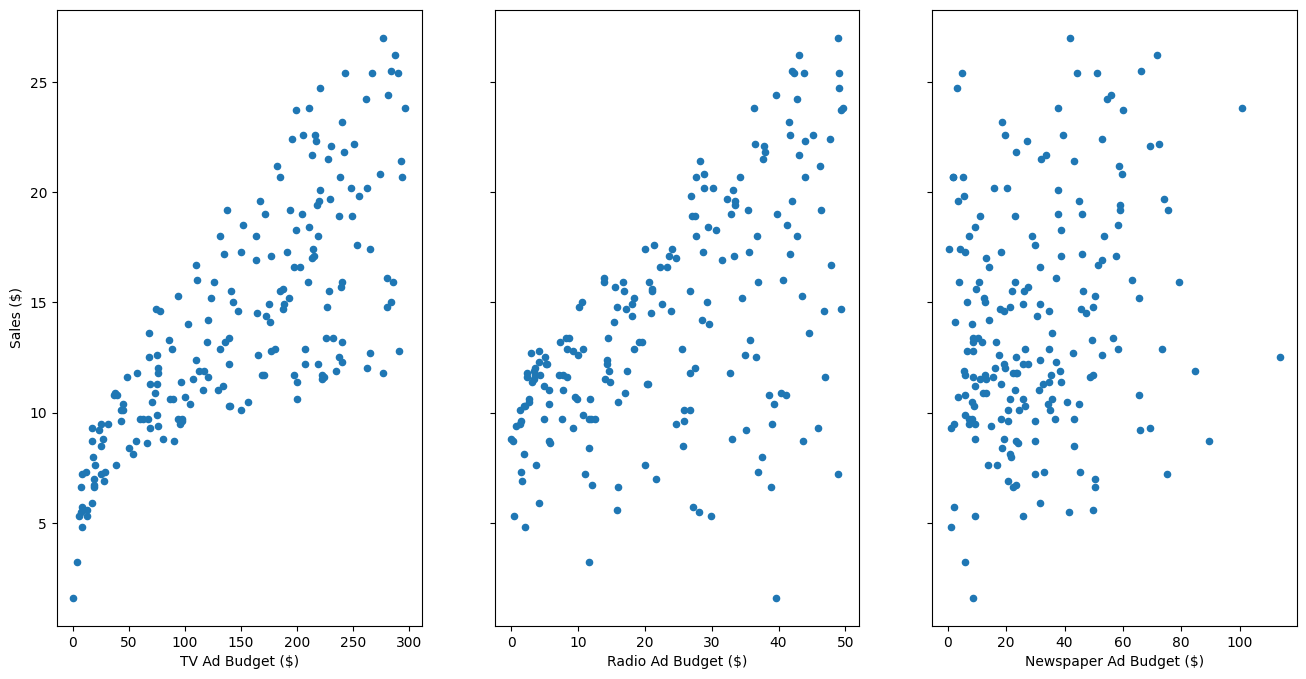

In [9]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='TV Ad Budget ($)', y='Sales ($)', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='Radio Ad Budget ($)', y='Sales ($)', ax=axs[1])
data.plot(kind='scatter', x='Newspaper Ad Budget ($)', y='Sales ($)', ax=axs[2])

## Questions about the data

A generic question shall be: How the company should optimise the spends on advertising to maximise the sales?

These general questions might lead you to more specific questions:
1. What’s the relationship between ads and sales?
2. How prominent is that relationship?
3. Which ad types contribute to sales?
4. How each ad contributes to sales?
5. Can sales be predicted based on the expense of the advertisement?

We will explore these questions below!

From the relationship diagrams above, it can be observed that there seems to be a linear relationship between the features TV ad,  Radio ad and the sales is almost a linear one. 

Hence, we can build a model using the Linear Regression Algorithm.


## Simple Linear Regression

- Simple Linear Regression is a method used to predict one numerical value using only one input value, by drawing a straight line that best fits the data.
- Example: Years of experience vs Salary, X = years of experience, Y = salary
- Formula: Y = a + bX
- Y → value to predict (marks)
- X → input value (study hours)
- a → starting value when X = 0 (marks if you didn’t study at all)
- b → change in Y when X increases by 1 (extra marks per additional hour of study)

### Estimating (Learning) Model Coefficients

- Y = a + bX
- a → intercept (starting value)
- b → slope (how fast Y increases or decreases)
- Finding the best values of a and b that make the prediction line fit the data as well as possible.

Learning means: 

- The model looks at the data points
- Tries different lines
- Chooses the line that gives the smallest overall prediction error
- No human tells the model the values of a and b.
- The model figures them out automatically from the data.

Errors/Residuals:

- Residual = Actual value − Predicted value
- Example: Actual marks = 70, Predicted marks = 65
- Residual = 70 − 65 = 5
- This is how far the prediction is from reality.

Why do we square the residuals?

- Errors can be positive or negative
- Squaring makes all errors positive
- Big mistakes get punished more
- Error = (Actual − Predicted)²

What is “least squares”

- Choose the line that makes the total of all squared errors as small as possible.


### The mathematics involved
Take a quick look at the plot created. Now consider each point, and know that each of them has a coordinate in the form (X, Y). Now draw an imaginary line between each point and the current "best-fit" line. We'll call the distance between each point and the current best-fit line as D. To get a quick image of what we're trying to visualize, take a look at the picture below:

<img src="http://upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Linear_least_squares_example2.svg/220px-Linear_least_squares_example2.svg.png">

What elements are present in the diagram?
- The red points are the **observed values** of x and y.
- The blue line is the **least squares line**.
- The green lines are the **residuals**, which is the distance between the observed values and the least squares line.


Before, we're labelling each green line as having a distance D, and each red point as having a coordinate of (X, Y). Then we can define our best fit line as the line having the property were:
$$ D_{1}^2 + D_{2}^2 + D_{3}^2 + D_{4}^2 + ....+ D_{N}^2$$

So how do we find this line? The least-square line approximating the set of points:

$$ (X,Y)_{1},(X,Y)_{2},(X,Y)_{3},(X,Y)_{4},(X,Y)_{5}, $$

has the equation:
$$ Y = a_{0} +a_{1}X $$
this is basically just a rewritten form of the standard equation for a line:
$$Y=mx+b$$

We can solve for these constants a0 and a1 by simultaneously solving these equations:
$$ \Sigma Y = a_{0}N + a_{1}\Sigma X $$
$$ \Sigma XY = a_{0}\Sigma X + a_{1}\Sigma X^2 $$
These are called the normal equations for the least-squares line. There are further steps that can be taken in rearranging these equations to solve for y, but we'll let scikit-learn do the rest of the heavy lifting here.

The general equation of a straight line is:$$𝑦={mx+b}$$
It means that if we have the value of m and b, we can predict all the values of y for corresponding x.
During construction of a Linear Regression Model, the computer tries to calculate the values of m and b to get a straight line.
But the question is:
###### How Do you Know this is the best fit line?
The best fit line is obtained by minimizing the _residual_.
Residual is the distance between the actual Y and the predicted Y

##### 1️⃣ Straight line & prediction (y = mx + b)
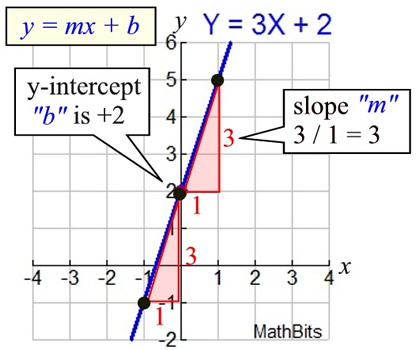
- This straight line is the prediction line
- If we know m (slope) and b (intercept), we can predict y for any x
- Linear Regression’s goal is to find the best values of m and b

##### 2️⃣ What is the “best fit line”?
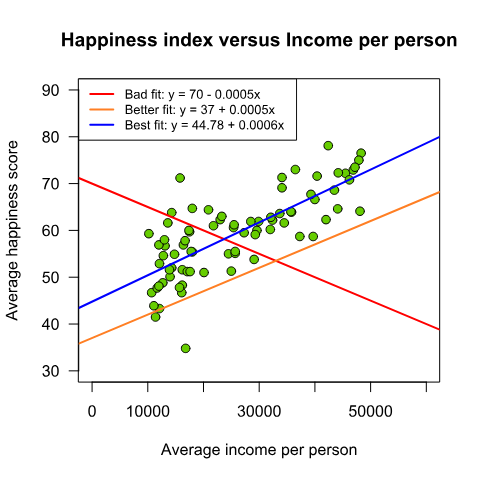
- Many straight lines are possible
- The best fit line is the one that stays closest to all data points
- “Closest” is measured using errors (residuals)

##### 3️⃣ What is a residual?
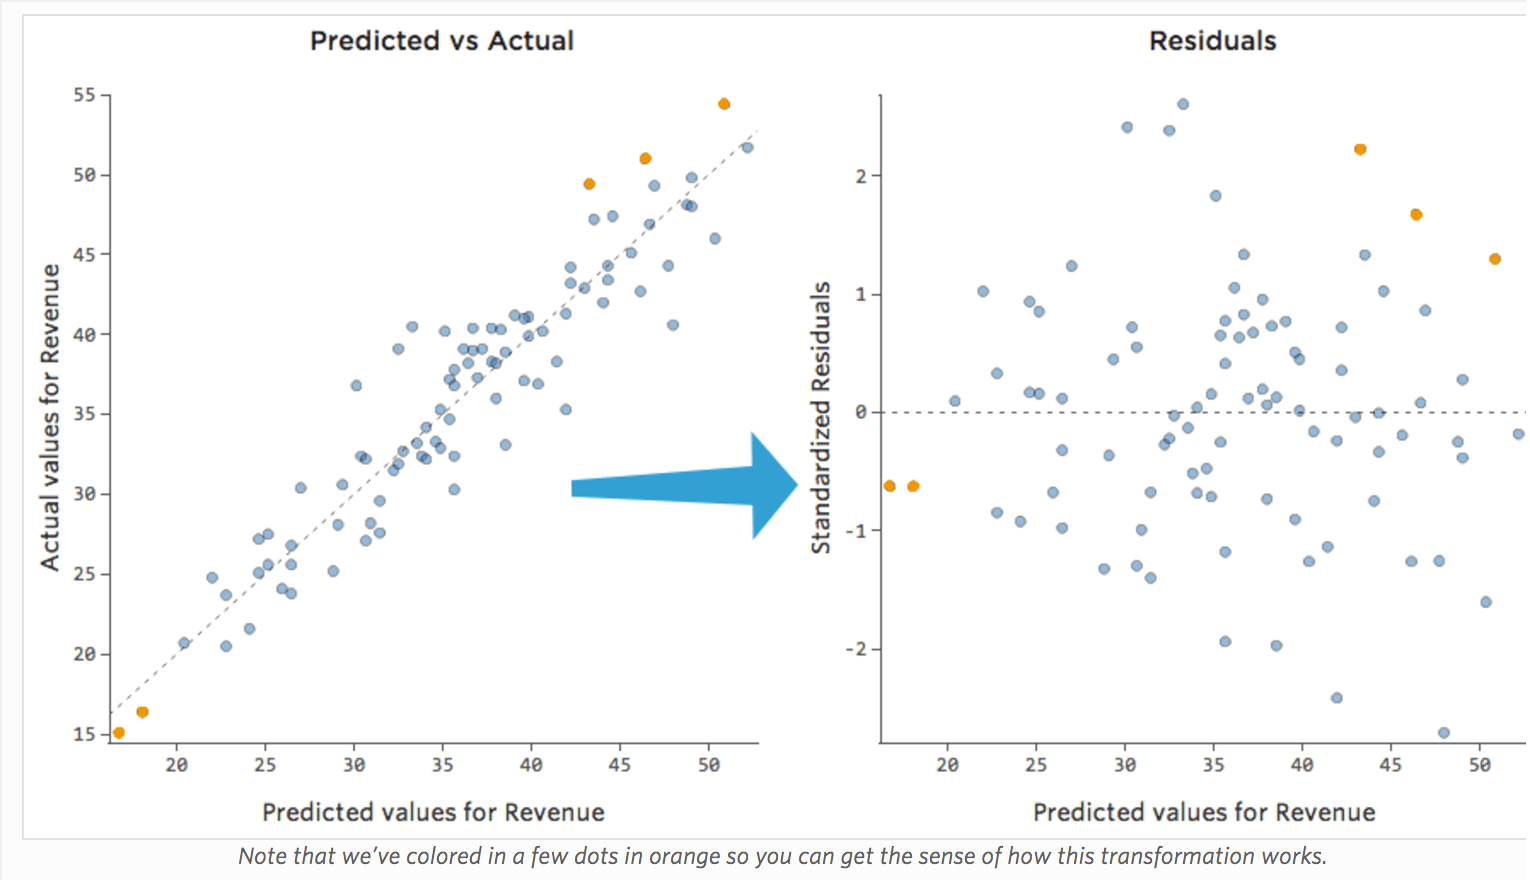
- A residual is the vertical distance between: Actual value (dot) and Predicted value (line)
- Residual = Actual Y − Predicted Y
- Each dot has one residual

##### 4️⃣ Why do we square residuals?
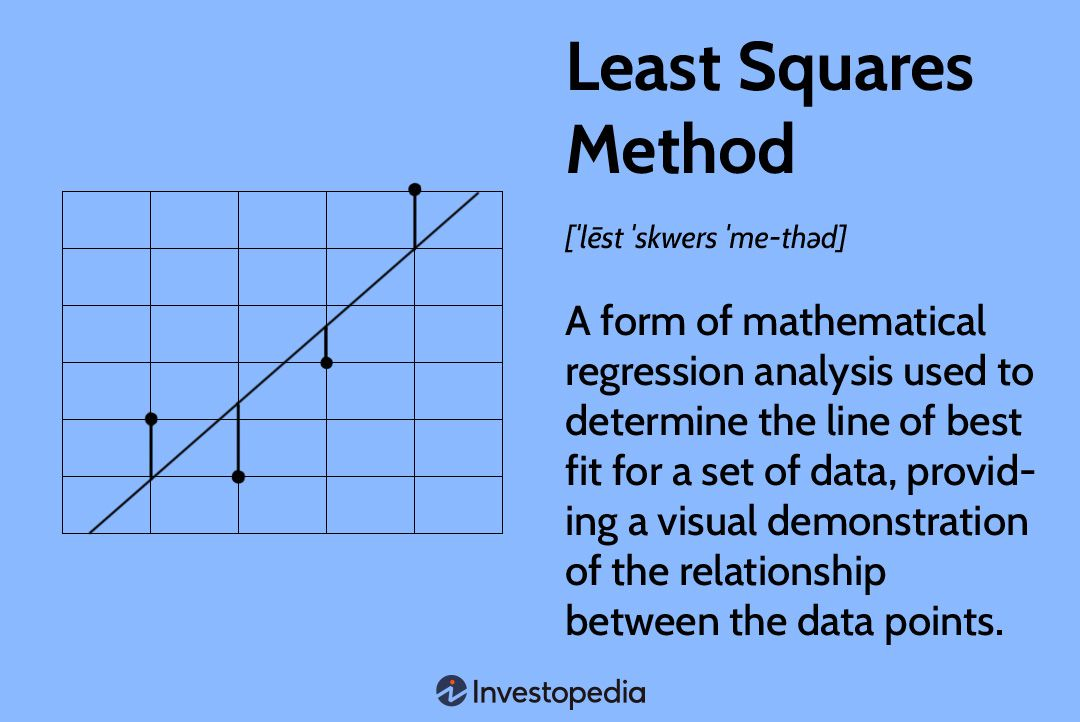
- Residuals can be positive or negative
- Squaring: Makes all errors positive
- Penalizes large mistakes more
- The model tries to minimize total squared error. This is called Least Squares.

##### 5️⃣ Residual depends on m and b
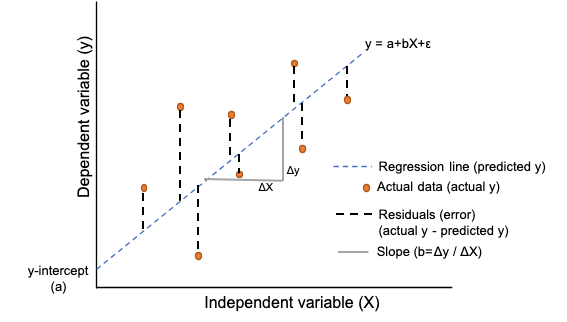
- Residual = 𝑦 − (𝑚x + b)
- So error depends on: m (slope), b (intercept)
- Changing m or b changes the total error

##### 6️⃣ Error surface (Paraboloid shape)
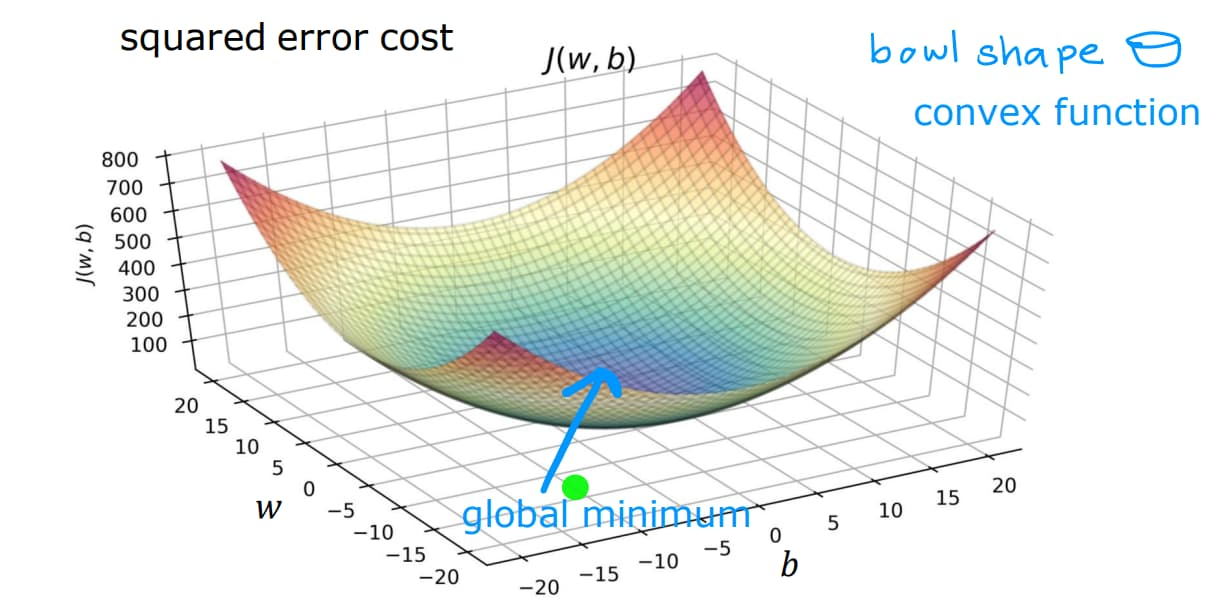
- When error is plotted against m and b, it forms a bowl shape
- This bowl is called a paraboloid
- The lowest point of the bowl = best m and b

#### What formula do we use to find the lowest error?
##### 1. Step 1: Cost (Error) function
- To find the lowest error (best-fit line) in Linear Regression, we use the partial derivatives of the cost function and set them equal to 0.
- The error we want to minimize is the Sum of Squared Residuals:
$$
J(m, b) = \sum_{i=1}^{n} \left( y_i - (m x_i + b) \right)^2
$$
- This function depends on: m (slope) and b (intercept)

##### 2. Step 2: Take derivatives
- Because the error depends on two variables, we take partial derivatives.
- Derivative with respect to m
$$
\frac{\partial J}{\partial m}
= -2 \sum_{i=1}^{n} x_i \left( y_i - (m x_i + b) \right)
$$

- Derivative with respect to b
$$
\frac{\partial J}{\partial b}
= -2 \sum_{i=1}^{n} \left( y_i - (m x_i + b) \right)
$$


##### 3. Step 3: Set derivatives equal to zero
- To find the minimum error, we set:
$$
\frac{\partial J}{\partial m} = 0
$$

$$
\frac{\partial J}{\partial b} = 0
$$

- Solving these two equations gives the best values of m and b.
- Derivative tells us direction of slope
- When derivative = 0 → no slope
No slope means:
- You are at the bottom of the error curve
- Error cannot reduce further


#### 8️⃣ Gradient Descent (finding the minimum)
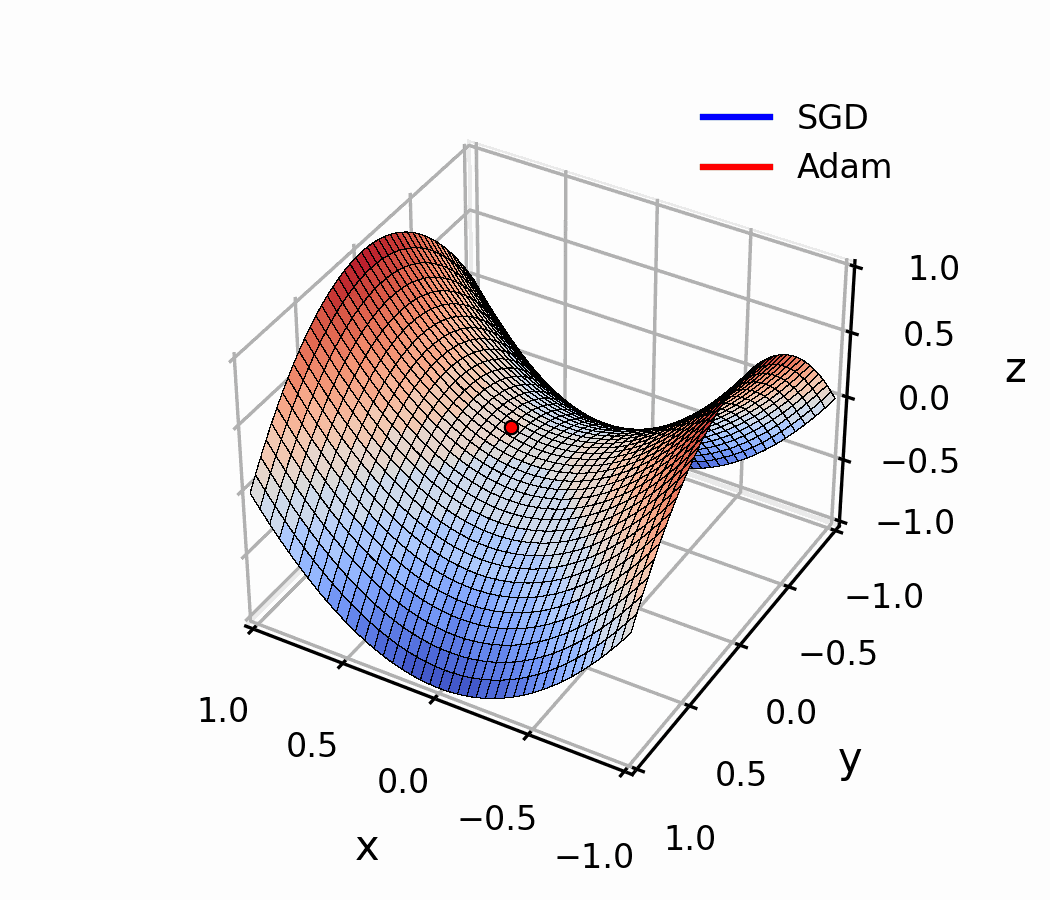
- Gradient Descent is like: Rolling a ball down a hill until it reaches the lowest point
- The algorithm: Starts with random m and b, Computes error, Moves step-by-step downhill, Stops at minimum error
- That point gives the best fit line.

### $R^2$ statistics

- R² shows what percentage of the variation in the data is explained by the model.
- R² = 0.75 → Model explains 75% of the data
- R² = 0 → Model explains nothing
- R² = 1 → Model explains everything perfectly
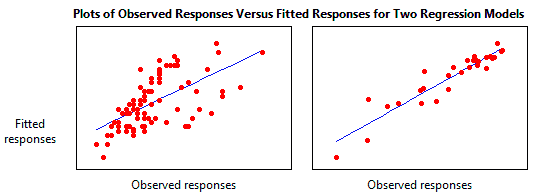
- Dots → Actual data points
- Horizontal line → Mean of Y (average value)
- Slanted line → Regression (model prediction)

R² compares:
- How much better the model line is
- Compared to just predicting the average every time

The R² formula:
$$
R^2 = 1 - \frac{RSS}{TSS}
$$

#### RSS — Residual Sum of Squares (model error)

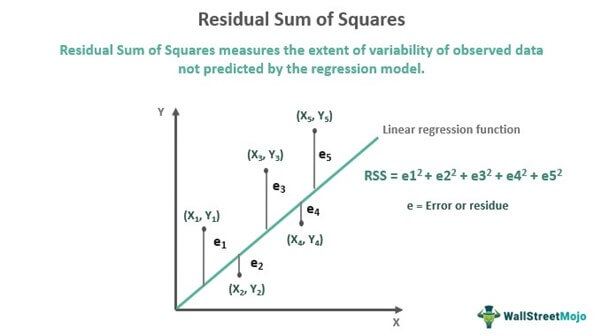
- Total squared distance between: Actual data points and Model’s predicted line
- Smaller RSS = better model

$$
RSS = \sum_{i=1}^{n} \left(y_i - \hat{y}_i\right)^2
$$

#### TSS — Total Sum of Squares (total variation)

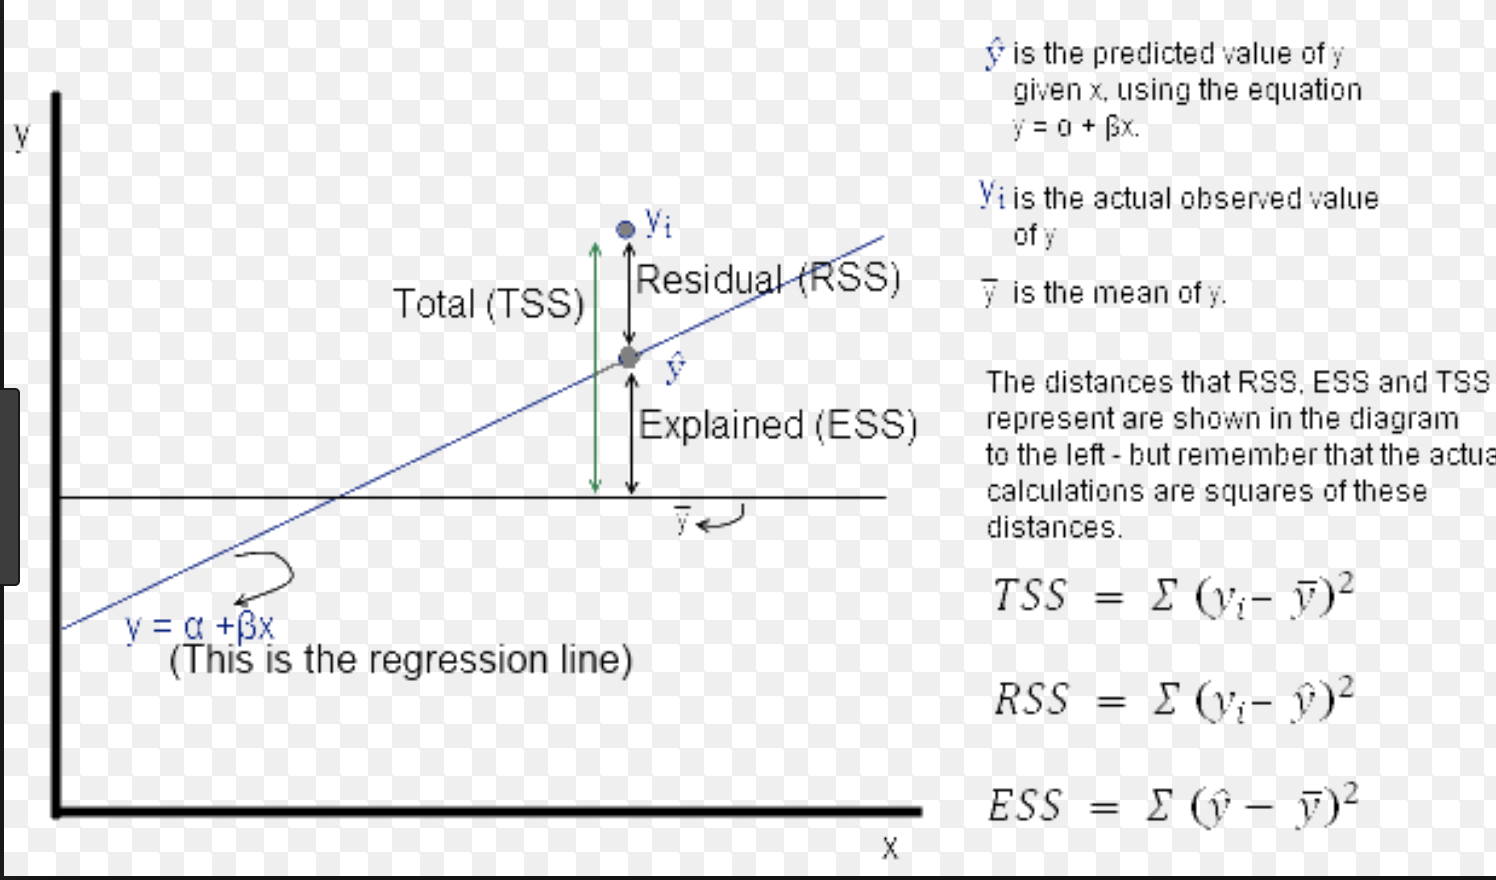
- Total squared distance between: Actual data points and Mean of Y (average line)
- This is the maximum possible error if you don’t use a model at all.

$$
TSS = \sum_{i=1}^{n} \left(y_i - \bar{y}\right)^2
$$


How R² works:
- TSS → Error when predicting using only the average
- RSS → Error when using your model
$$
R^2 = 1 - \frac{Error reduced by model​}{Total Error}
$$


## Adjusted R²

- Adjusted R² checks whether adding new variables actually improves the model, instead of blindly increasing the score.

Problem with R²:

- When you add more independent variables, R² always increases
- Even if the new variable: Is random, Has no real relationship with the output
- So R² can be misleading.

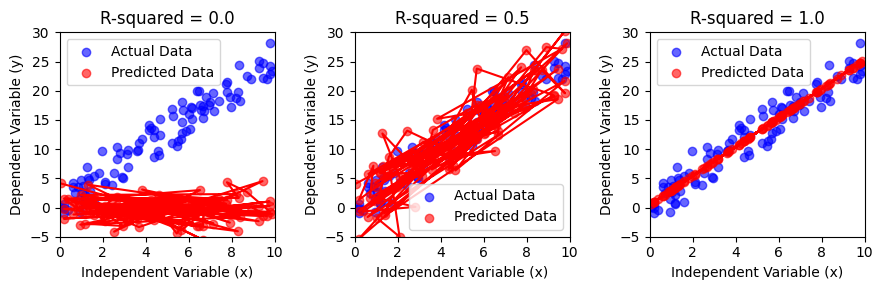

What does Adjusted R² do?

- Rewards useful variables
- Penalizes useless variables

So:

- If a new variable helps → Adjusted R² goes up
- If it does not help → Adjusted R² goes down

Adjusted R² formula:

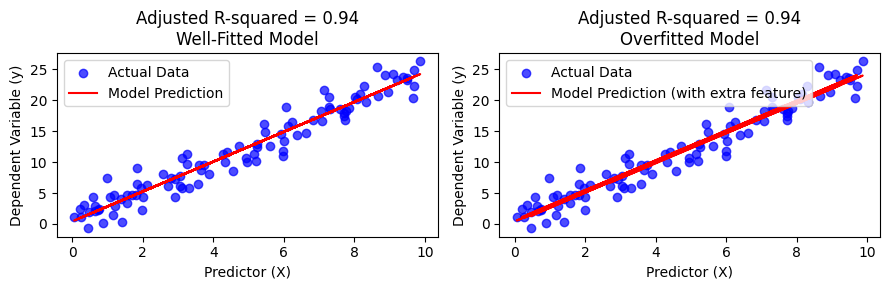

- n = number of data points
- p = number of independent variables
- As p (number of features) increases,
- The formula penalizes unnecessary features

- R²: keeps increasing 📈
- Adjusted R²: increases only if the model truly improves ✔️

In [14]:
# create X and y
feature_cols = ['TV']
X = data[feature_cols]
y = data.Sales

# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression(fit_intercept=False)
lm.fit(X, y)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

0.0
[0.08324961]


In [15]:
type(y)

pandas.core.series.Series

In [16]:
lm.predict([[18779789]])

/Users/sahanakommalapati/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1563410.08603353])

### Interpreting the model

How do we interpret the coefficient for spends on TV ad ($\beta_1$)?
- A "unit" increase in spends on a TV ad is **associated with** a 0.047537 "unit" increase in Sales.
- Or, an additional $1,000  on TV ads is **translated to** an increase in sales by 47.53 Dollars.

As an increase in TV ad expenditure is associated with a **decrease** in sales, $\beta_1$ would be **negative**.


## Prediction  using the model

If the expense on TV ad is $50000, what will be the sales prediction for that market?

$$y = \beta_0 + \beta_1x$$
$$y = 7.032594 + 0.047537 \times 50$$


In [17]:
#calculate the prediction
7.032594 + 0.047537*50

9.409444

Thus, we would predict Sales of **9,409 widgets** in that market.

Let's do the same thing using code.

In [18]:
#  Let's create a DataFrame since the model expects it
X_new = pd.DataFrame({'TV': [50]})
X_new.head()

,TV
0,50


In [19]:
# use the model to make predictions on a new value
lm.predict(X_new)

array([4.16248044])

### Plotting the Least Squares Line

In [20]:
# create a DataFrame with the minimum and maximum values of TV
X_new = pd.DataFrame({'TV': [data.TV.min(), data.TV.max()]})
X_new.head()

,TV
0,0.7
1,296.4


In [21]:
# make predictions for those x values and store them
preds = lm.predict(X_new)
preds

array([ 0.05827473, 24.67518402])

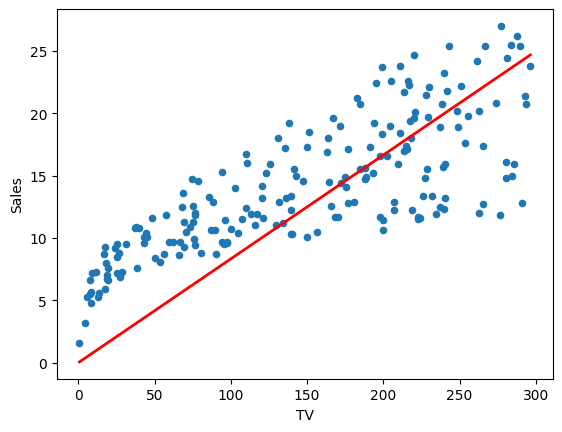

In [23]:
# first, plot the observed data
data.plot(kind='scatter', x='TV', y='Sales')

# then, plot the least squares line
plt.plot(X_new, preds, c='red', linewidth=2)

## Model Confidence

- It measures how reliable the model’s learned numbers are if we repeated the experiment many times.
- If we repeated the data collection and model training many times, about 95 out of 100 times the confidence interval would contain the true coefficient value.
- My height is between 170 cm and 172 cm
- If this range is a 95% confidence interval
- If you measured your height 100 times, about 95 times the true height would fall inside that range.
- It's a High bias/low variance model.

## Bias
- Bias means the model is too simple and misses the real pattern.
## Variance
- Variance means the model learns the noise instead of the real pattern.

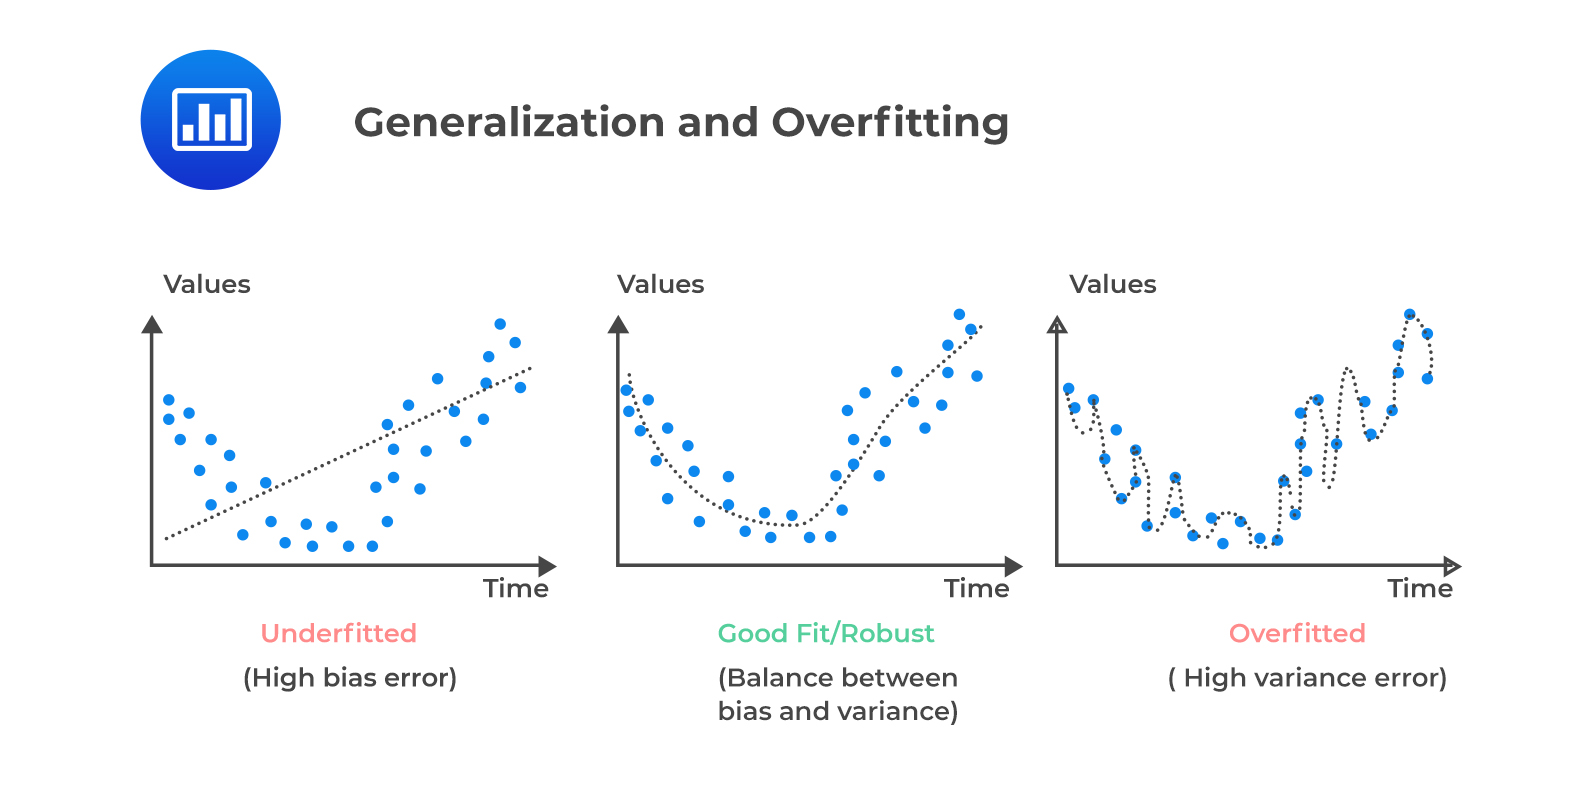

In [ ]:
pip install sta

In [24]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='sales ~ TV', data=data).fit()
lm.conf_int()

ModuleNotFoundError: No module named 'statsmodels'